# Confusion Matrix Analysis and Viewing Misclassifications

In [1]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.utils import to_categorical

# Training Parameters
batch_size = 64
epochs = 1

# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Now we one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

# create model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

# We can use the summary function to display our model layers and parameters
print(model.summary())

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Number of Classes: 10
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
___________________________

#### Let's save our history file

In [2]:
import pickle 

pickle_out = open("MNIST_history.pickle","wb")
pickle.dump(history.history, pickle_out)
pickle_out.close()

#### Loading out saved history is as simple as these two lines

In [3]:
pickle_in = open("MNIST_history.pickle","rb")
saved_history = pickle.load(pickle_in)
print(saved_history)

{'loss': [0.7766780077775319], 'accuracy': [0.75701666], 'val_loss': [0.255510806620121], 'val_accuracy': [0.9265]}


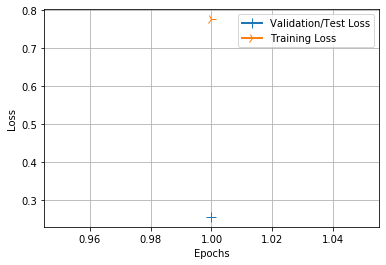

In [5]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

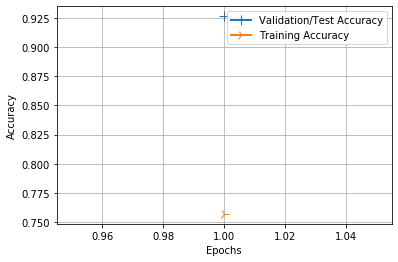

In [7]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

#### Now let's display our Confusion Matrix and Classification Report

In [8]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

y_pred = model.predict_classes(x_test)

print(classification_report(np.argmax(y_test,axis=1), y_pred))
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.95      0.99      0.97      1135
           2       0.94      0.91      0.92      1032
           3       0.88      0.94      0.91      1010
           4       0.91      0.94      0.93       982
           5       0.96      0.85      0.90       892
           6       0.93      0.96      0.95       958
           7       0.90      0.94      0.92      1028
           8       0.92      0.88      0.90       974
           9       0.95      0.87      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

[[ 964    0    1    3    0    2    7    1    2    0]
 [   0 1120    4    2    0    1    3    0    5    0]
 [  12    4  940   14   10    0   11   19   21    1]
 [   1    2   11  950    1    5    0   18   17    5]
 [   1    4    6    0  925   

### Displaying our misclassified data

In [9]:
import cv2
import numpy as np
from tensorflow.keras.datasets import mnist

# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

# Use numpy to create an array that stores a value of 1 when a misclassification occurs
result = np.absolute(y_test - y_pred)
result_indices = np.nonzero(result > 0)

#  Display the indices of mislassifications
print("Indices of misclassifed data are: \n\n" + str(result_indices))

Indices of misclassifed data are: 

(array([   8,   33,   62,   66,   73,   77,  121,  124,  151,  193,  195,
        217,  233,  241,  247,  259,  290,  300,  313,  318,  320,  321,
        340,  341,  349,  352,  359,  362,  381,  403,  406,  412,  435,
        444,  445,  448,  464,  478,  479,  483,  495,  502,  507,  511,
        515,  528,  530,  543,  551,  565,  578,  582,  591,  606,  610,
        613,  619,  624,  628,  659,  667,  684,  689,  691,  707,  717,
        720,  728,  740,  791,  839,  844,  924,  939,  944,  947,  950,
        951,  956,  965,  975,  982,  992, 1003, 1014, 1032, 1033, 1039,
       1044, 1062, 1068, 1082, 1089, 1101, 1107, 1112, 1114, 1119, 1128,
       1152, 1181, 1192, 1198, 1200, 1204, 1206, 1224, 1226, 1228, 1232,
       1234, 1242, 1243, 1247, 1253, 1256, 1260, 1270, 1272, 1283, 1289,
       1299, 1319, 1326, 1378, 1393, 1402, 1409, 1423, 1433, 1440, 1453,
       1465, 1466, 1476, 1500, 1514, 1525, 1527, 1530, 1549, 1553, 1554,
       1559, 1

### Displaying the misclassifications

In [10]:
import cv2 
#from keras.models import load_model

#classifier = load_model('/home/deeplearningcv/DeepLearningCV/Trained Models/mnist_simple_cnn.h5')

def draw_test(name, pred, input_im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0]*2 ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2.putText(expanded_image, str(true_label), (250, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,0,255), 2)
    cv2.imshow(name, expanded_image)

for i in range(0,10):

    input_im = x_test[result_indices[0][i]]
    #print(y_test[result_indices[0][i]])
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC) 
    input_im = input_im.reshape(1,28,28,1) 
    
    ## Get Prediction
    res = str(model.predict_classes(input_im, 1, verbose = 0)[0])
    draw_test("Prediction", res, imageL, y_test[result_indices[0][i]]) 
    cv2.waitKey(0)

cv2.destroyAllWindows()